<a href="https://colab.research.google.com/github/vamsyvijay/OIBSIP/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In our day to day life we are going to come across different kinds of messages and mails, from those we might encounter some spam mails and messages as well. So our task is to classify the spam messages and ham messages based on the text data that we have until now.

# Import the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load the Data

In [ ]:
df= pd.read_csv("/content/spam.csv",encoding='ISO-8859-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data Cleaning


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

we get to know that the last 3 columns have complete null values so we have to delete them

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


let's change the column names

In [ ]:
df.rename({"v1":'target','v2':'text'},axis=1,inplace=True)

In [ ]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


let's change the ham to 0 and spam to 1

In [ ]:
df['target'] = df['target'].map({'ham':0,'spam':1})

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,target
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
len(df.text[0])


111

In [ ]:
len(df.text[0].split())

20

In [ ]:
len(df.text[0].split(","))


2

In [ ]:
df.target.value_counts()


0    4825
1     747
Name: target, dtype: int64

In [ ]:
fig=px.pie(df.target , names=['ham','spam'],values=df.target.value_counts(),title='The distribution of ham and spam messages')
fig.show()

we can see the data is little imbalanced by having the ham text as most

let's try to create some new features based on the available featues

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
text_len=[]
for i in df.text:
  text_len.append(len(i))


In [ ]:
df['text_len'] = text_len

In [ ]:
df.head()

,target,text,text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
words =[]
for i in df.text:
  words.append(len(i.split()))

In [ ]:
df['words']= words

In [ ]:
df.head()

,target,text,text_len,words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [ ]:
sentences=[]
for i in df.text:
  sentences.append(len(i.split(",")))

In [ ]:
df['sentences']= sentences

In [ ]:
df.head()

,target,text,text_len,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,2


In [ ]:
# ham messages
df[df['target']==0].describe()

,target,text_len,words,sentences
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,14.200622,1.312539
std,0.0,58.016023,11.424511,0.773028
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,7.000000,1.000000
50%,0.0,52.000000,11.000000,1.000000
75%,0.0,92.000000,19.000000,1.000000
max,0.0,910.000000,171.000000,14.000000


In [ ]:
#spam messages
df[df.target==1].describe()

,target,text_len,words,sentences
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,23.851406,1.542169
std,0.0,29.183082,5.811898,1.032593
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,22.000000,1.000000
50%,1.0,149.000000,25.000000,1.000000
75%,1.0,157.000000,28.000000,2.000000
max,1.0,224.000000,35.000000,7.000000


In [ ]:
px.histogram(df[df.target==0]['words'],color_discrete_sequence=['green'])

In [ ]:
px.histogram(df[df.target==1]['words'],color_discrete_sequence=['red'])

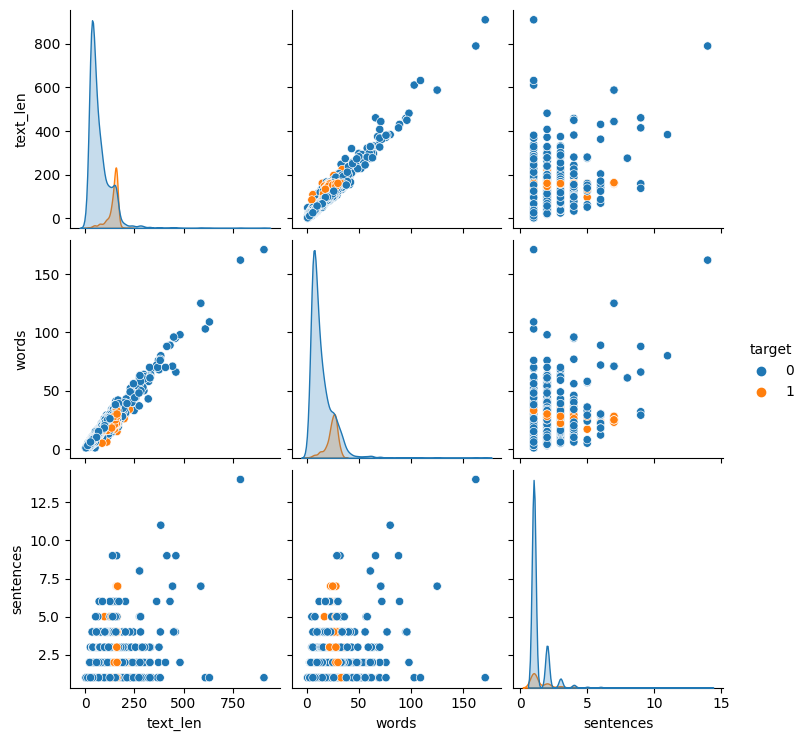

In [ ]:
sns.pairplot(df,hue='target')

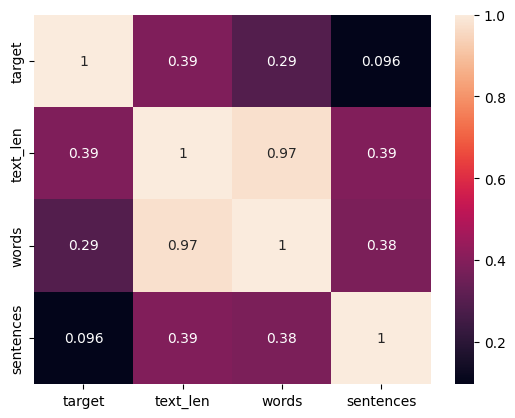

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#Preprocessing and splitting the data

*   Lowercase the data

*   tokenization
*   removing special characters


*   removing puncutations and stopwords
*   stemming







In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
def conversion(data):

  data= data.lower()
  data = word_tokenize(data)
  y=[]
  for i in data:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  result=[stemmer.stem(i) for i in y]


  return " ".join(result)


In [ ]:
df['new_text']= df['text'].apply(conversion)

In [ ]:
df.head()

,target,text,text_len,words,sentences,test,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,1,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,2,nah think goe usf live around though,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud()

In [ ]:
cloud_pic_of_spam = wc.generate(df[df.target==1]['new_text'].str.cat(sep=" "))

In [ ]:
cloud_pic_of_spam=px.imshow(cloud_pic_of_spam)
cloud_pic_of_spam.update_layout(
    title="The most used words in the spam messages"
)

In [ ]:
cloud_pic_of_ham = wc.generate(df[df.target==0]['new_text'].str.cat(sep=" "))

cloud_pic_of_ham=px.imshow(cloud_pic_of_ham)
cloud_pic_of_ham.update_layout(
    title="The most used words in the ham messages"
)

#Model Building

In [ ]:
#split the data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['new_text']).toarray()
y = df['target']

# vectorizer = TfidfVectorizer()
# classifier = MultinomialNB()

# You should use your actual training data to fit the vectorizer, this is just an example
# training_data = ["spam message 1", "ham message 1", "spam message 2", "ham message 2"]
# X_train = vectorizer.fit_transform(training_data)
# labels = np.array([1, 0, 1, 0])
# classifier.fit(X_train, labels)

In [ ]:
X.shape

(5572, 6580)

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [ ]:
!pip install lazypredict
# we'll use automl to predict and classify
# This saves our time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(predictions=True)
models= clf.fit(X_train, X_test, y_train, y_test)



In [ ]:
print(models)

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.97               0.93     0.93      0.97   
LinearSVC                          0.97               0.92     0.92      0.97   
ExtraTreesClassifier               0.98               0.92     0.92      0.98   
Perceptron                         0.94               0.92     0.92      0.94   
DecisionTreeClassifier             0.97               0.91     0.91      0.97   
RandomForestClassifier             0.97               0.91     0.91      0.97   
LGBMClassifier                     0.97               0.90     0.90      0.97   
BaggingClassifier                  0.97               0.90     0.90      0.97   
LogisticRegression                 0.97               0.90     0.90      0.97   
NearestCentroid                    0.97               0.89     0.89      0.97   
BernoulliNB                

From the above consideration we have chosen MultinomialNB as our model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = spam_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9641255605381166


In [ ]:
print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[965   0]
 [ 40 110]]


In [ ]:
print(f'Classification Report:\n{classification_rep}')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.73      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



In [ ]:
import pickle

In [ ]:
pickle.dump(spam_classifier,open("spam_detector.pkl",'wb'))